In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 51.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('co2-emissions-and-gdp rename wala ARIMA model.csv',index_col='Final Date',parse_dates=True)
print('Shape of data',df.shape)
df.head()

Shape of data (8352, 14)


,Country,Code,GDP per capit PPP constant 2017 international $,Annual CO2 emissions per capita,ABC Corp Revenue 1% of GDP,ABC Corp - Annual CO2 emissions per capita,XYZ Corp Revenue 5% of GDP,XYZ Corp - Annual CO2 emissions per capita 2%,SAM1 Corp Revenue 2% of GDP,SAM1 Corp - Annual CO2 emissions per capita 2%,SAM2 Corp Revenue 7% of GDP,SAM2 Corp - Annual CO2 emissions per capita 2%,SAM3 Corp Revenue 3% of GDP,SAM3 Corp - Annual CO2 emissions per capita 2%
Final Date,,,,,,,,,,,,,,
1990-12-01,Afghanistan,AFG,NaN,0.2097,0.0,0.21,0.0,0.22,0.0,0.21,0.0,0.20,0.0,0.21
1991-12-01,Afghanistan,AFG,NaN,0.1825,0.0,0.19,0.0,0.19,0.0,0.19,0.0,0.19,0.0,0.18
1992-12-01,Afghanistan,AFG,NaN,0.0952,0.0,0.10,0.0,0.10,0.0,0.10,0.0,0.10,0.0,0.09
1993-12-01,Afghanistan,AFG,NaN,0.0843,0.0,0.09,0.0,0.09,0.0,0.09,0.0,0.08,0.0,0.09
1994-12-01,Afghanistan,AFG,NaN,0.0751,0.0,0.08,0.0,0.08,0.0,0.08,0.0,0.07,0.0,0.08


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [5]:
test_result=adfuller(df['ABC Corp - Annual CO2 emissions per capita'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','Critical Values']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [6]:
adfuller_test(df['ABC Corp - Annual CO2 emissions per capita'])

ADF Test Statistic : -10.645841651802463
p-value : 4.7983570190846985e-19
#Lags Used : 37
Number of Observations Used : 8314
Critical Values : {'1%': -3.4311367837567053, '5%': -2.8618877038538306, '10%': -2.566955077924446}
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [7]:
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
stepwise_fit = auto_arima(df['ABC Corp - Annual CO2 emissions per capita'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=35082.935, Time=16.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=54672.951, Time=0.55 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=35159.224, Time=1.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46595.312, Time=3.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57722.984, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35089.115, Time=5.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35094.499, Time=7.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=35064.018, Time=10.65 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=35079.667, Time=3.05 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=34994.816, Time=19.28 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=35032.167, Time=14.86 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=35011.508, Time=22.83 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=34989.574, Time=23.85 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=35036.558, Time=17.78 sec
 ARIMA(5,0,3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8352
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -17467.787
Date:                Fri, 25 Feb 2022   AIC                          34955.573
Time:                        08:42:18   BIC                          35025.876
Sample:                             0   HQIC                         34979.585
                               - 8352                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0928      0.022      4.291      0.000       0.050       0.135
ar.L1          0.9196      0.030     30.967      0.000       0.861       0.978
ar.L2         -0.1367      0.011    -12.340      0.000      -0.158      -0.115
ar.L3          1.0045      0.012     84.092      0.000       0.981       1.028
ar.L4         -0.8094      0.030    -27.393      0.000      -0.867      -0.751
ma.L1         -0.0501      0.030     -1.673      0.094      -0.109       0.009
ma.L2          0.1629      0.025      6.419      0.000       0.113       0.213
ma.L3         -0.8247      0.029    -28.181      0.000      -0.882      -0.767
ma.L4          0.1240      0.006     19.999      0.000       0.112       0.136
sigma2         3.8269      0.014    278.637      0.000       3.800       3.854
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2452821.95
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             1.09
Prob(H) (two-sided):                  0.68   Kurtosis:                        86.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(8352, 14)
(8322, 14) (30, 14)


In [11]:
import statsmodels.tsa.arima.model as stats

In [12]:
model=ARIMA(train['ABC Corp - Annual CO2 emissions per capita'],order=[4,0,4])
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:     ABC Corp - Annual CO2 emissions per capita   No. Observations:                 8322
Model:                                         ARIMA(4, 0, 4)   Log Likelihood              -17414.695
Date:                                        Fri, 25 Feb 2022   AIC                          34849.389
Time:                                                08:43:04   BIC                          34919.656
Sample:                                                     0   HQIC                         34873.393
                                                       - 8322                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2483      0.601      7.064      0.000       3.070       5.427
ar.L1          0.5837      0.026     22.543      0.000       0.533       0.634
ar.L2          0.5207      0.012     43.829      0.000       0.497       0.544
ar.L3          0.6636      0.011     57.714      0.000       0.641       0.686
ar.L4         -0.7923      0.024    -32.884      0.000      -0.840      -0.745
ma.L1          0.2817      0.026     10.826      0.000       0.231       0.333
ma.L2         -0.2002      0.031     -6.442      0.000      -0.261      -0.139
ma.L3         -0.7942      0.024    -33.788      0.000      -0.840      -0.748
ma.L4          0.1471      0.007     21.360      0.000       0.134       0.161
sigma2         3.8660      0.015    254.731      0.000       3.836       3.896
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):           2446868.25
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             1.20
Prob(H) (two-sided):                  0.84   Kurtosis:                        86.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

8322    1.547136
8323    1.642083
8324    1.854226
8325    2.037452
8326    2.121728
8327    2.331883
8328    2.451954
8329    2.542232
8330    2.730142
8331    2.800017
8332    2.903431
8333    3.053353
8334    3.092208
8335    3.206219
8336    3.310560
8337    3.337838
8338    3.452966
8339    3.513285
8340    3.543879
8341    3.647934
8342    3.673418
8343    3.714989
8344    3.797338
8345    3.801525
8346    3.854244
8347    3.908909
8348    3.905806
8349    3.964126
8350    3.991061
8351    3.991782
Name: predicted_mean, dtype: float64
Final Date
1991-12-01    1.547136
1992-12-01    1.642083
1993-12-01    1.854226
1994-12-01    2.037452
1995-12-01    2.121728
1996-12-01    2.331883
1997-12-01    2.451954
1998-12-01    2.542232
1999-12-01    2.730142
2000-12-01    2.800017
2001-12-01    2.903431
2002-12-01    3.053353
2003-12-01    3.092208
2004-12-01    3.206219
2005-12-01    3.310560
2006-12-01    3.337838
2007-12-01    3.452966
2008-12-01    3.513285
2009-12-01    3.543879
2010-

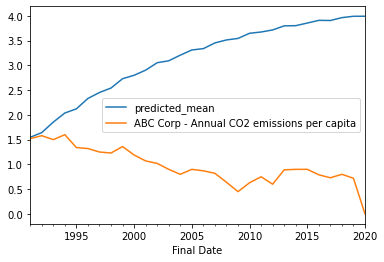

In [14]:
pred.plot(legend=True)
test['ABC Corp - Annual CO2 emissions per capita'].plot(legend=True)

In [15]:
test['ABC Corp - Annual CO2 emissions per capita'].mean()

0.9689999999999999

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['ABC Corp - Annual CO2 emissions per capita']))
print(rmse)

2.406665943103124


In [17]:
model2=ARIMA(df['ABC Corp - Annual CO2 emissions per capita'],order=((4,0,4)))
model2=model2.fit()
df.tail()

,Country,Code,GDP per capit PPP constant 2017 international $,Annual CO2 emissions per capita,ABC Corp Revenue 1% of GDP,ABC Corp - Annual CO2 emissions per capita,XYZ Corp Revenue 5% of GDP,XYZ Corp - Annual CO2 emissions per capita 2%,SAM1 Corp Revenue 2% of GDP,SAM1 Corp - Annual CO2 emissions per capita 2%,SAM2 Corp Revenue 7% of GDP,SAM2 Corp - Annual CO2 emissions per capita 2%,SAM3 Corp Revenue 3% of GDP,SAM3 Corp - Annual CO2 emissions per capita 2%
Final Date,,,,,,,,,,,,,,
2016-12-01,Zimbabwe,ZWE,3173.610829,0.7708,31.7,0.79,15.87,0.81,6.35,0.81,22.2,0.74,9.5,0.73
2017-12-01,Zimbabwe,ZWE,3274.611198,0.7198,32.7,0.73,16.37,0.73,6.55,0.76,22.9,0.75,9.8,0.73
2018-12-01,Zimbabwe,ZWE,3341.665418,0.7854,33.4,0.80,16.71,0.80,6.68,0.79,23.4,0.77,10.0,0.75
2019-12-01,Zimbabwe,ZWE,3027.656038,0.7084,30.3,0.72,15.14,0.74,6.06,0.74,21.2,0.73,9.1,0.69
2020-12-01,Zimbabwe,ZWE,2744.690758,NaN,27.4,0.00,13.72,0.00,5.49,0.00,19.2,0.00,8.2,0.00


2020-12-01    0.283933
2020-12-02    0.483486
2020-12-03    0.658297
2020-12-04    0.789874
2020-12-05    1.002212
2020-12-06    1.151988
2020-12-07    1.299529
2020-12-08    1.499187
2020-12-09    1.623834
2020-12-10    1.780213
2020-12-11    1.950997
2020-12-12    2.057235
2020-12-13    2.213181
2020-12-14    2.348295
2020-12-15    2.444329
2020-12-16    2.589679
2020-12-17    2.690400
2020-12-18    2.782249
2020-12-19    2.908101
2020-12-20    2.981243
2020-12-21    3.071052
2020-12-22    3.171729
2020-12-23    3.226547
2020-12-24    3.312722
2020-12-25    3.386814
2020-12-26    3.432117
2020-12-27    3.510718
2020-12-28    3.560930
2020-12-29    3.603039
2020-12-30    3.669684
2020-12-31    3.701668
Freq: D, Name: ARIMA Predicitions, dtype: float64


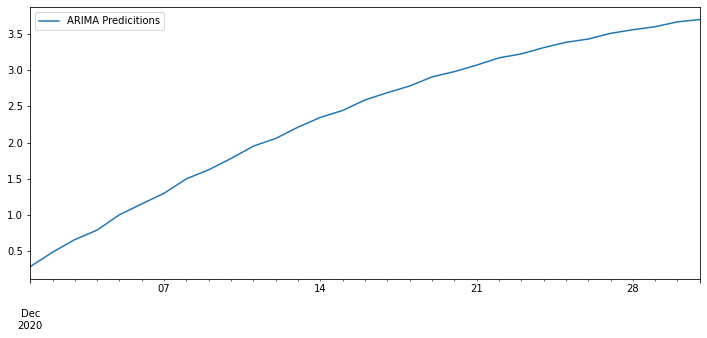

In [18]:
index_future_dates=pd.date_range(start='2020-12-01',end='2020-12-31')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predicitions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

2020-12-01    0.283933
2020-12-02    0.483486
2020-12-03    0.658297
2020-12-04    0.789874
2020-12-05    1.002212
2020-12-06    1.151988
Freq: D, Name: ARIMA Predicitions, dtype: float64


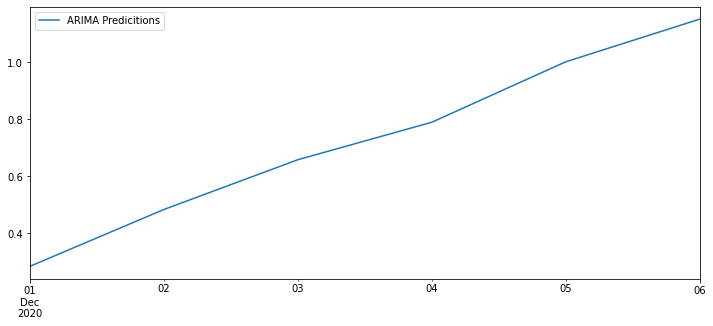

In [19]:
index_future_dates=pd.date_range(start='2020-12-01',end='2020-12-06')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+5,typ='levels').rename('ARIMA Predicitions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

2021-12-07    0.283933
2021-12-08    0.483486
2021-12-09    0.658297
2021-12-10    0.789874
2021-12-11    1.002212
2021-12-12    1.151988
Freq: D, Name: ARIMA Predicitions, dtype: float64


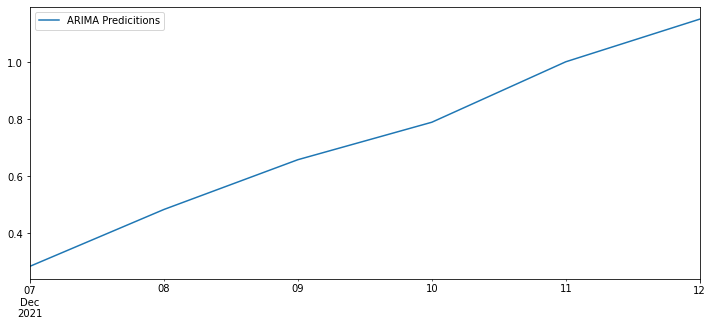

In [20]:
index_future_dates=pd.date_range(start='2021-12-07',end='2021-12-12')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+5,typ='levels').rename('ARIMA Predicitions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

2022-12-13    0.283933
2022-12-14    0.483486
2022-12-15    0.658297
2022-12-16    0.789874
2022-12-17    1.002212
2022-12-18    1.151988
Freq: D, Name: ARIMA Predicitions, dtype: float64


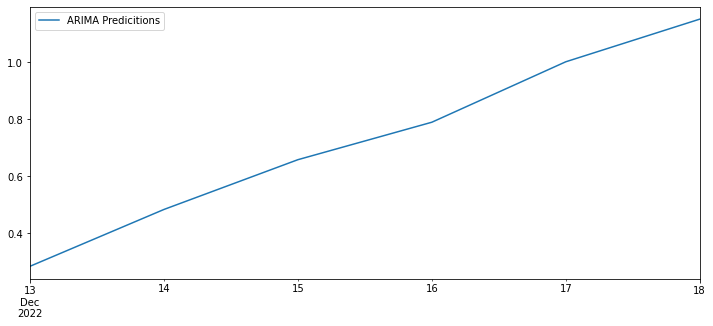

In [21]:
index_future_dates=pd.date_range(start='2022-12-13',end='2022-12-18')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+5,typ='levels').rename('ARIMA Predicitions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

2023-12-19    0.283933
2023-12-20    0.483486
2023-12-21    0.658297
2023-12-22    0.789874
2023-12-23    1.002212
2023-12-24    1.151988
Freq: D, Name: ARIMA Predicitions, dtype: float64


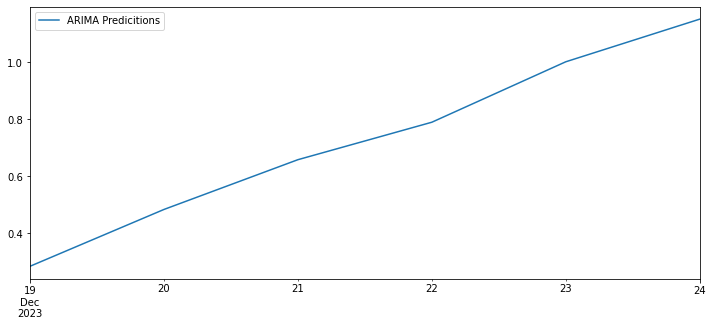

In [22]:
index_future_dates=pd.date_range(start='2023-12-19',end='2023-12-24')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+5,typ='levels').rename('ARIMA Predicitions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

2024-12-25    0.283933
2024-12-26    0.483486
2024-12-27    0.658297
2024-12-28    0.789874
2024-12-29    1.002212
2024-12-30    1.151988
Freq: D, Name: ARIMA Predicitions, dtype: float64


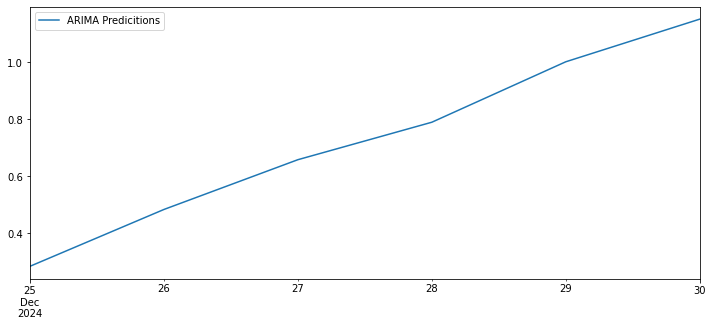

In [23]:
index_future_dates=pd.date_range(start='2024-12-25',end='2024-12-30')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+5,typ='levels').rename('ARIMA Predicitions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

2024-12-25    0.283933
2024-12-26    0.483486
2024-12-27    0.658297
2024-12-28    0.789874
2024-12-29    1.002212
2024-12-30    1.151988
Freq: D, Name: ARIMA Predicitions, dtype: float64


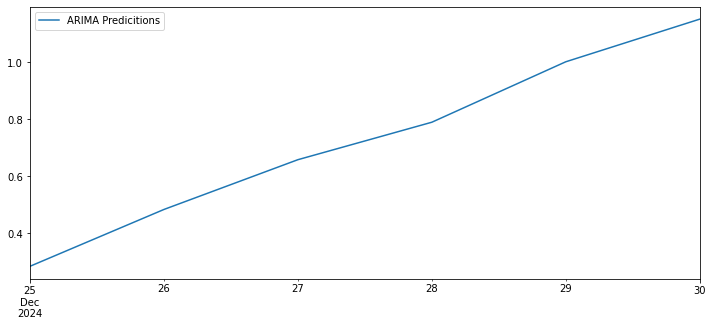

In [24]:
index_future_dates=pd.date_range(start='2020-12-01',end='2020-12-06')
index_future_dates=pd.date_range(start='2021-12-07',end='2020-12-12')
index_future_dates=pd.date_range(start='2022-12-13',end='2022-12-18')
index_future_dates=pd.date_range(start='2023-12-19',end='2023-12-24')
index_future_dates=pd.date_range(start='2024-12-25',end='2024-12-30')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+5,typ='levels').rename('ARIMA Predicitions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

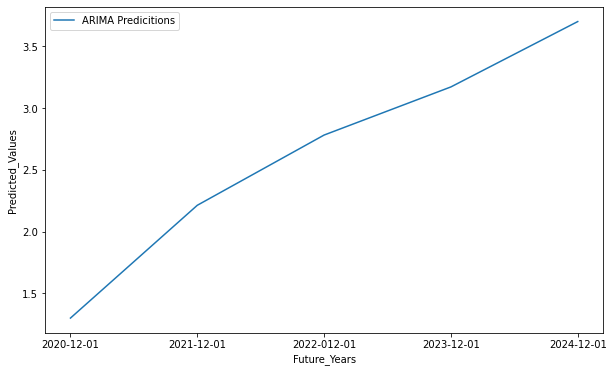

In [42]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# creating DataFrame
dataFrame = pd.DataFrame({'Future_Years': ['2020-12-01', '2021-12-01', '2022-012-01', '2023-12-01', '2024-12-01'],'Predicted_Values': [1.299529,2.213181, 2.782249, 3.1722,3.701668]
})

# time series plot
fig = (10, 6)
fig, ax = plt.subplots(figsize=fig)
sns.lineplot(x = "Future_Years" , y = "Predicted_Values", ax=ax, data=dataFrame, label='ARIMA Predicitions')
plt.legend(loc="upper left")
plt.show()